In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.lines as mlines
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay

In [7]:
data = pd.read_csv('./results/all_results_df.csv')
data

,Corpus,Type,TTR,MATTR,Char Entr,Word Entr,Text Entr,Lex Entr,Rev Lex Entr
0,id,nat,5.804406,0.700090,4.070997,11.148131,3.595690,1.944459,1.984659
1,tl,nat,7.498319,0.609710,3.894602,9.976462,3.544414,1.881334,1.922877
2,tr,nat,13.993292,0.827652,4.386971,13.166179,4.257474,1.561815,1.662302
3,en,nat,6.025770,0.697744,4.166890,10.690033,4.138779,1.916237,1.965091
4,de,nat,12.010972,0.769293,4.230064,11.598005,4.002635,1.612682,1.695224
5,fr,nat,7.304848,0.721023,4.177654,10.715771,3.625466,1.787924,1.874849
6,eo,con,10.589734,0.692378,4.164256,10.920602,3.909751,1.788268,1.893195
7,lfn,con,5.083459,0.600948,3.912139,9.320495,4.059735,2.000799,2.111598
8,ia,con,6.795857,0.596837,4.030916,9.935303,3.762086,1.834966,1.910784
9,io,con,3.677265,0.566818,4.083562,8.296066,1.153088,1.981079,2.089008


One Class SVM

In [8]:
# X, y = data.iloc[:,2:].values.round(decimals=3), data.iloc[:,1].map({'con':-1, 'nat':1}).values
# scaler = StandardScaler()
# strat_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
# svm = OneClassSVM()

# for train_idx, test_idx in strat_kfold.split(X, y):
#     X_train, X_test = X[train_idx], X[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]
    
#     # Extract 'nat' class for training
#     X_train_nat = X_train[y_train == 1]
    
#     # Normalize data
#     X_train_scaled = scaler.fit_transform(X_train_nat)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Train
#     svm.fit(X_train_scaled)
    
#     # Predict
#     predictions = svm.predict(X_test_scaled)
    
#     # Evaluate
#     precision = precision_score(y_test, predictions, pos_label=-1)
#     recall = recall_score(y_test, predictions, pos_label=-1)
#     f1 = f1_score(y_test, predictions, pos_label=-1)
    
#     print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")

In [9]:
df = pd.read_csv('./results/all_results_df.csv')
train_df = df.drop(df[df['Type'] == 'con'].index)
test_df = df.drop(df[df['Type'] == 'nat'].index)

scaler = StandardScaler()
# Training on only natural languages
X_train = scaler.fit_transform(train_df.iloc[:,2:].values.round(decimals=3))
# Testing on constructed languages
X_test = scaler.fit_transform(test_df.iloc[:,2:].values.round(decimals=3))

# SVM Model
svm = OneClassSVM(nu=0.01, verbose=False)
svm.fit(X_train)

svm_pred = svm.predict(X_test)
scores = svm.score_samples(X_test)
print({lang: pred for lang, pred in zip(test_df['Corpus'], scores)})
# print({lang: pred for lang, pred in zip(test_df['Corpus'], svm_pred)})

{'eo': 0.04120597173432923, 'lfn': 0.028173381272779647, 'ia': 0.04246367316493513, 'io': 0.03649438466435061}


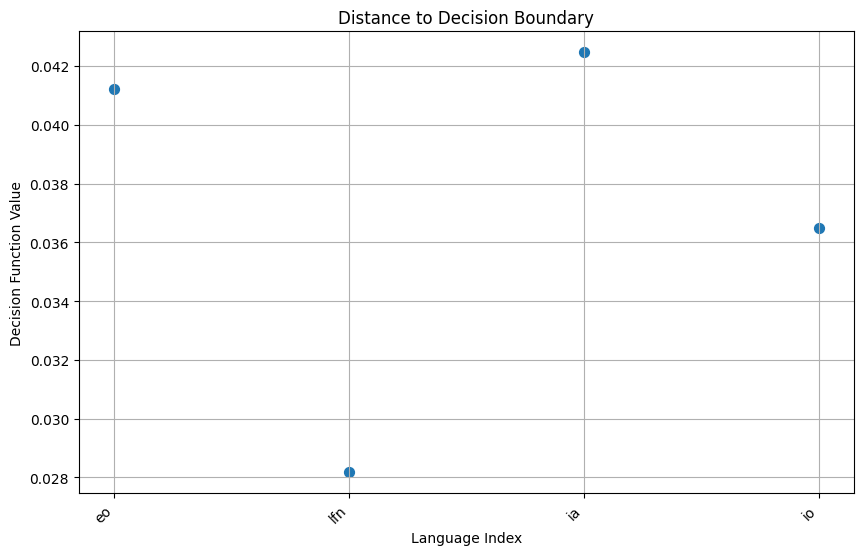

In [10]:
# Plot decision function values
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(scores)), scores, marker='o', s=50)
plt.xlabel('Language Index')
plt.ylabel('Decision Function Value')
plt.title('Distance to Decision Boundary')
plt.xticks(np.arange(len(scores)), test_df['Corpus'], rotation=45, ha='right')  # Use language names as x-axis labels
plt.grid(True)
plt.show()

ValueError: n_features must be equal to 2. Got 7 instead.

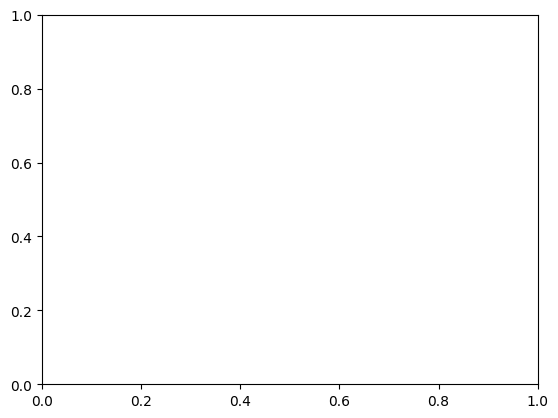

In [12]:
estimators = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}

X = scaler.fit_transform(df.iloc[:,2:].values.round(decimals=3))

fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]
# Learn a frontier for outlier detection with several classifiers
legend_lines = []
for color, (name, estimator) in zip(colors, estimators.items()):
    estimator.fit(X)
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],
        colors=color,
        ax=ax,
    )
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))


ax.scatter(X[:, 0], X[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
ax.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
ax.legend(handles=legend_lines, loc="upper center")
_ = ax.set(
    xlabel="ash",
    ylabel="malic_acid",
    title="Outlier detection on a real data set (wine recognition)",
)

In [ ]:
# from sklearn.inspection import DecisionBoundaryDisplay

# disp = DecisionBoundaryDisplay.from_estimator(
#     svm, X_test, response_method="predict", xlabel=, ylabel=, alpha=0.5
# )

Local Outlier Factor

In [ ]:
lof = LocalOutlierFactor(n_neighbors=18, algorithm='auto', novelty=True, contamination=0.1)
lof.fit(X_train)

In [ ]:
lof_pred = lof.predict(X_test)
print({lang: pred for lang, pred in zip(test_df['corpus'], lof_pred)})